In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [209]:
df = pd.read_csv("CC GENERAL.csv")

In [210]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [211]:
df.shape

(8950, 18)

In [212]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [213]:
#checking for null values
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [214]:
#dropping 'CUST_ID' as it is not necessary
df.drop(['CUST_ID'], axis=1, inplace=True)
#dropping the one missing value in 'CREDIT_LIMIT' variable
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

Filling the missing values in 'MINIMUM_PAYMENTS' variable with mean seems a bit irrelevant to this situation because not all customers pay $800 as minimum payment. So, we can use median here.

In [215]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

In [233]:
#checking if there are anymore missing values
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8949 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   int64  
 11  PURCHASES_TRX                     8949 non-null   int64  
 12  CREDIT

<Figure size 7200x7200 with 0 Axes>

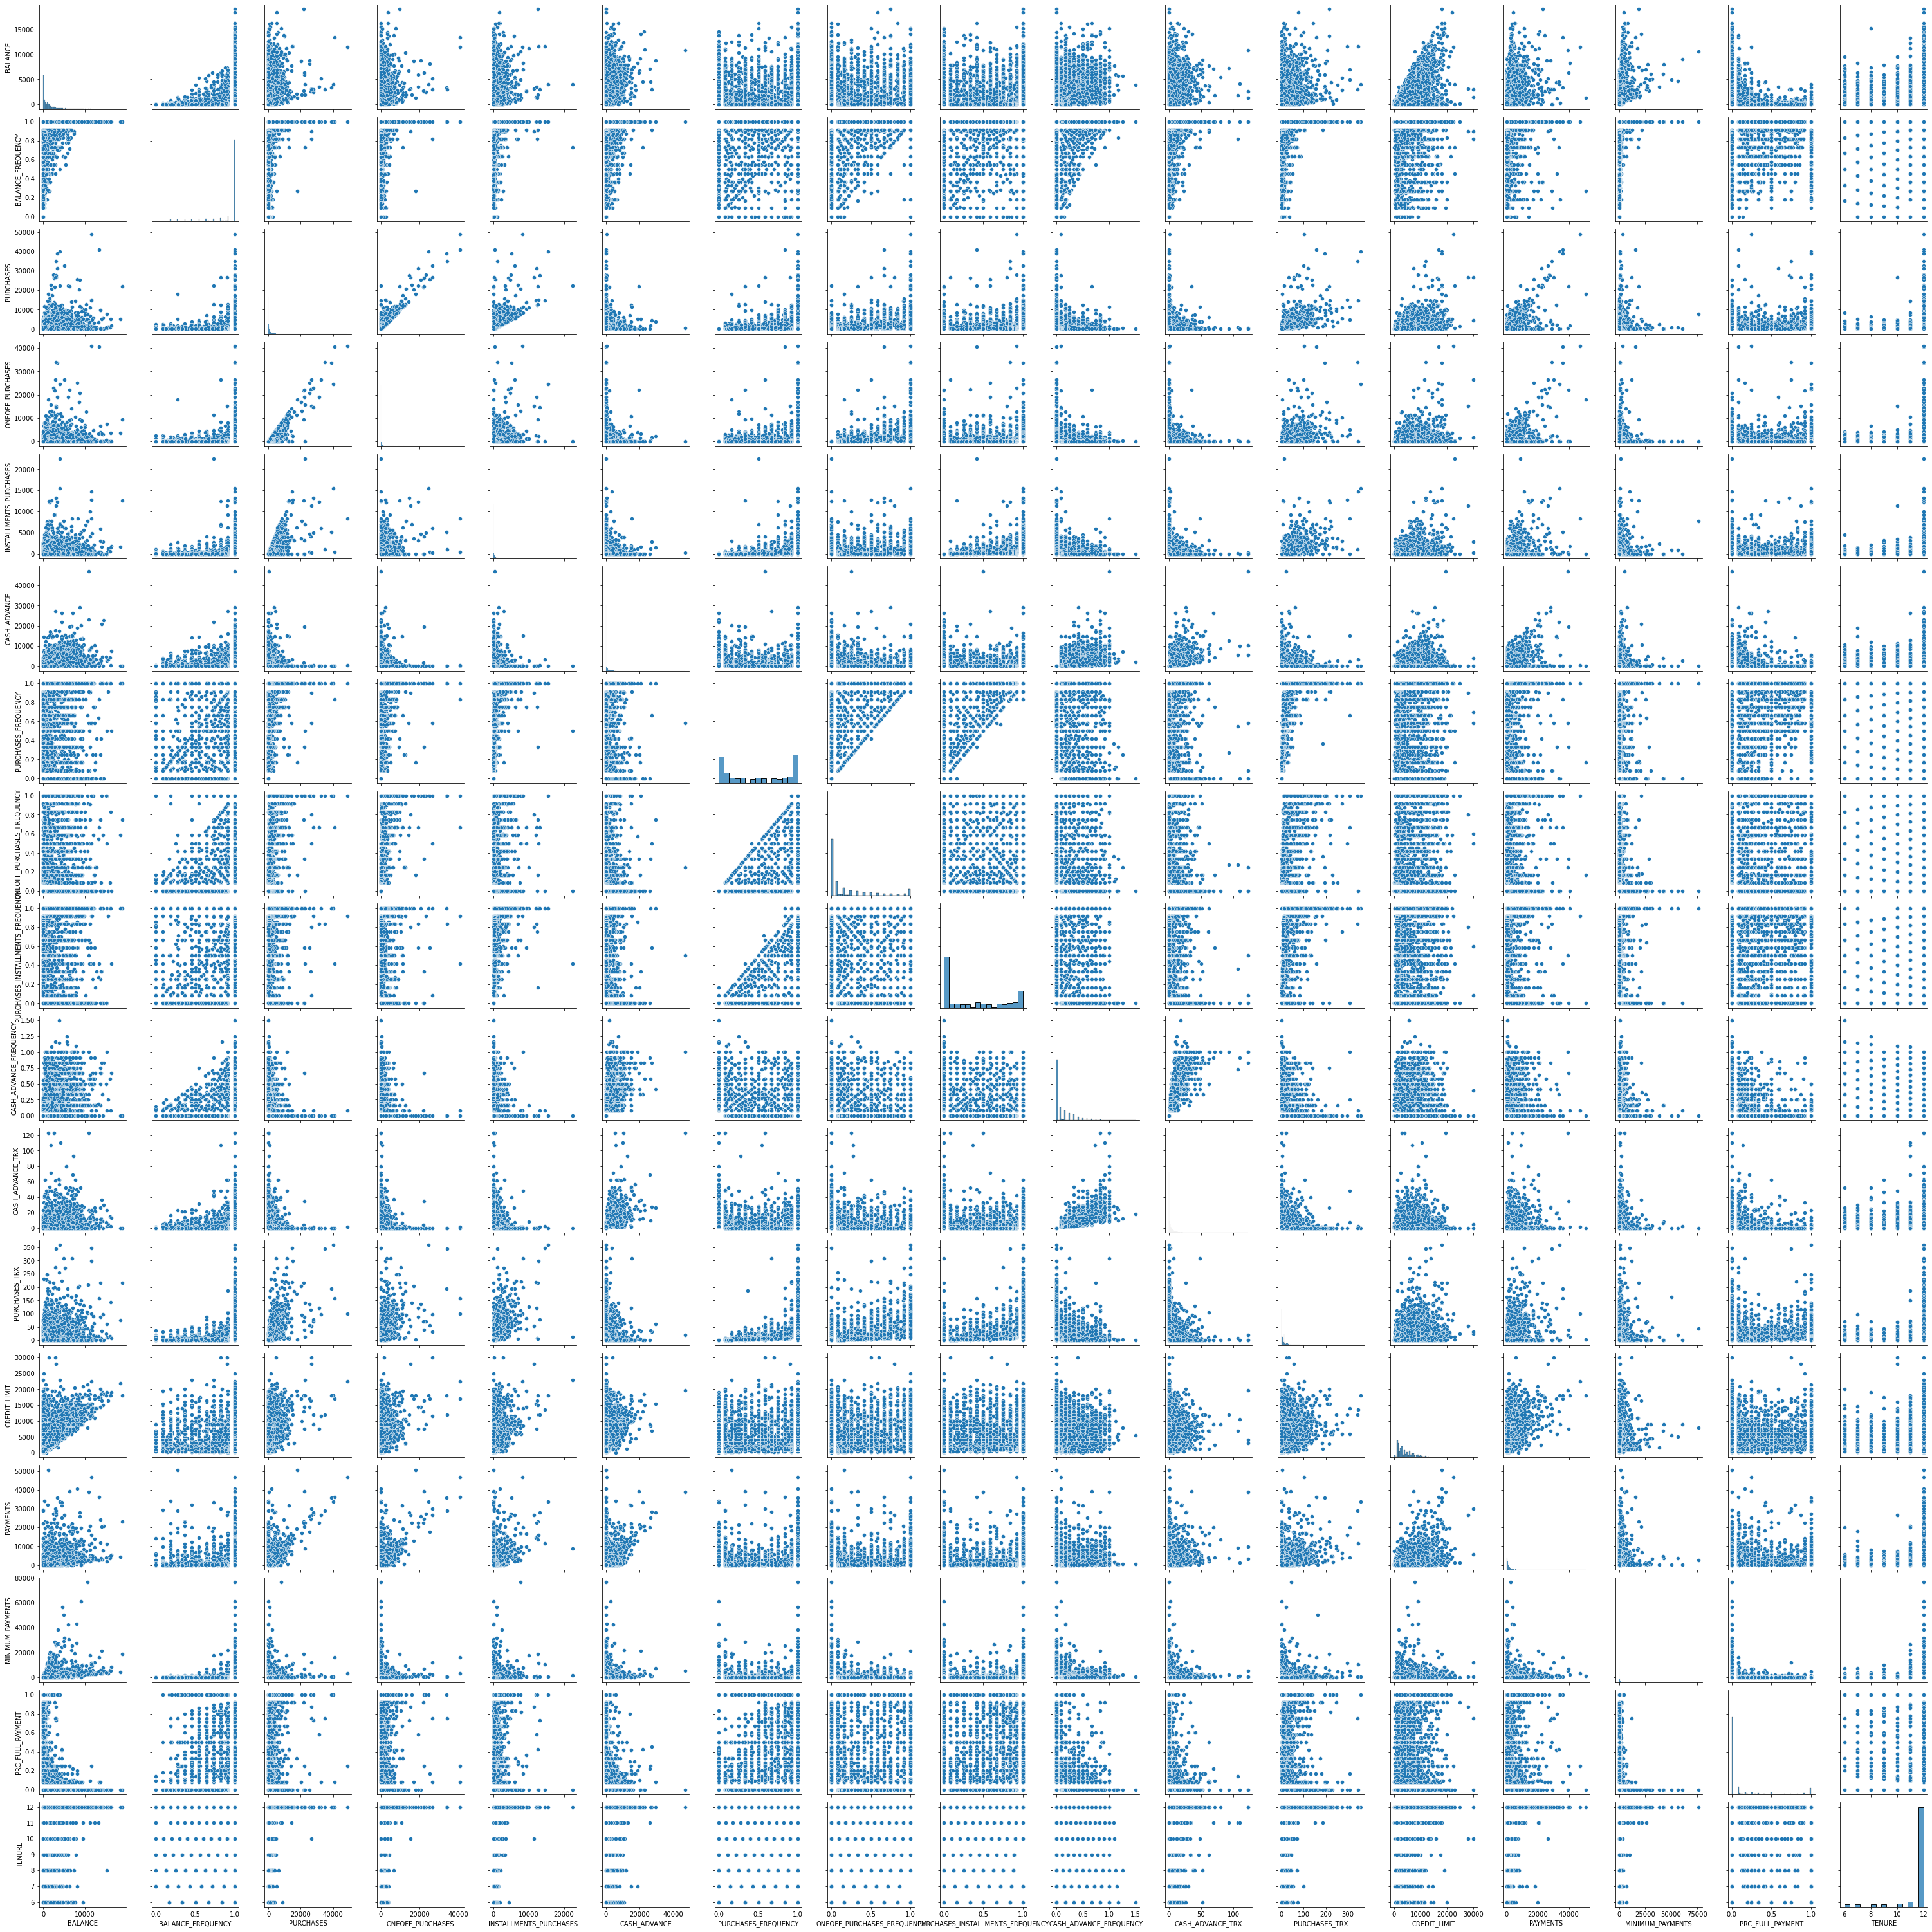

In [234]:
plt.figure(figsize=(100,100))
sns.pairplot(df)
plt.show()

From the above pair plots, it can be seen that the variables are skewed greatly. So, this typically means that only a part of the customers spend more, while others do not or only a part of the customers do full payment of their credit card bills. This makes sense because, one part pays in full, while others pay in installments, and few others do not sometimes pay the bill at all. 

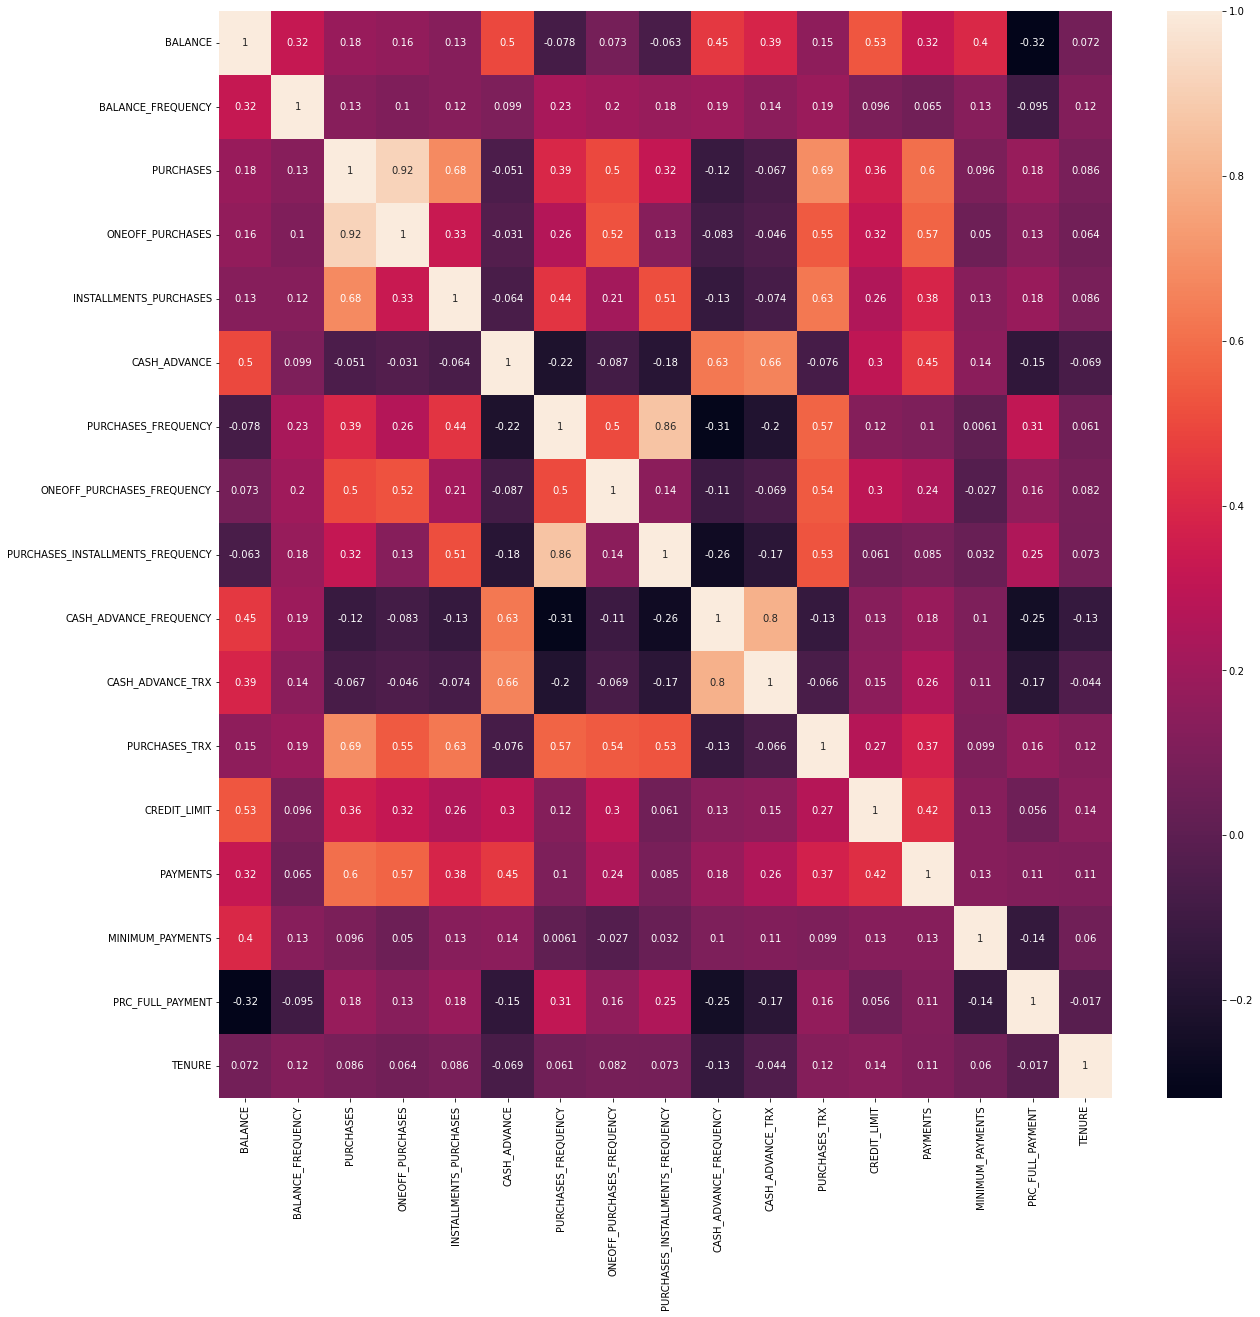

In [219]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True)
plt.show()

From the correlation heatmap above, there are a few variables that are highly correlated. They are:

 - OneOff_Purchases and Purchases
 - Purchases_Installments_Frequency and Purchases
 - Cash_Advance_TRX and Cash_Advance_Frequency
 
As we can see, they all almost has similar meaning like for example, OneOff_Purchases variable means maximum amount used to purchase in one go while the variable Purchases means amount spent on a purchase.

So, we can move forward with the dimensionality reduction to handle this problem.

# PCA Dimensionality Reduction

In [220]:
pca = PCA(n_components = 0.95)
pca_credit = pca.fit_transform(df)

In [221]:
#getting the explained variance ratio to see how much variance does each of the components have
pca.explained_variance_ratio_

array([0.47540341, 0.1776897 , 0.1400484 , 0.11349302, 0.04809598])

So, we can see that the 95% variance is in the first 5 components

In [222]:
#number of clusters
clusters = []

for i in range(1,21):
    kmeans_model = KMeans(n_clusters = i, init = "k-means++", random_state = 20).fit(pca_credit)
    clusters.append(kmeans_model.inertia_)

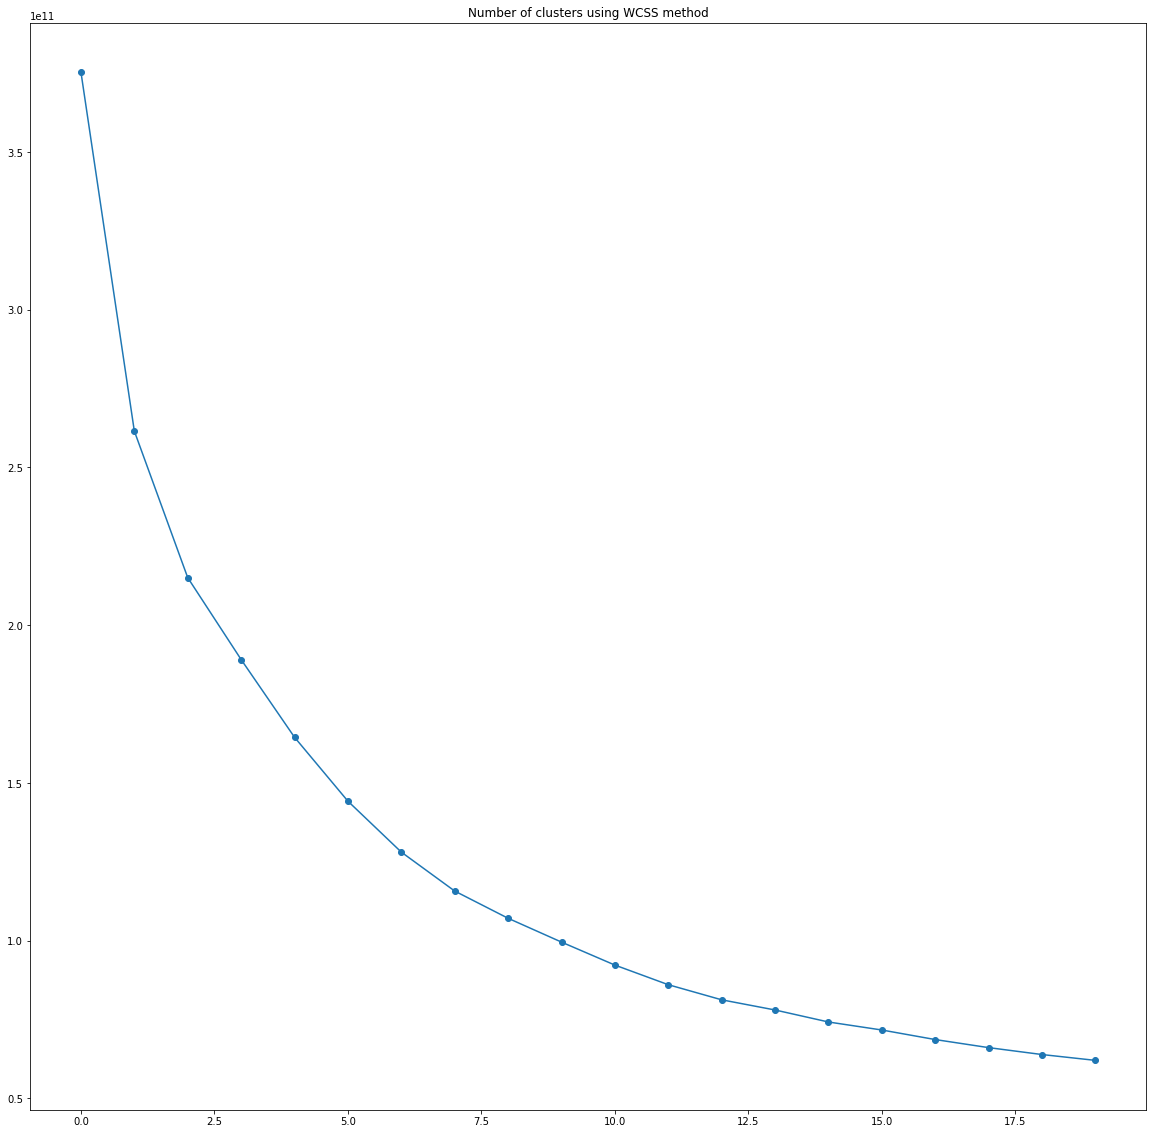

In [223]:
plt.figure(figsize = (20,20))
plt.plot(clusters, marker = 'o')
plt.xlabel = ('Number of Clusters')
plt.ylabel = ('WCSS')
plt.title('Number of clusters using WCSS method')
plt.show()

In [224]:
kmeans_k = [KMeans(n_clusters = i, init = "k-means++", random_state = 20).fit(pca_credit) for i in range(1,10)]

In [225]:
silhoutte_scores = [silhouette_score(pca_credit, model.labels_) for model in kmeans_k[1:]]

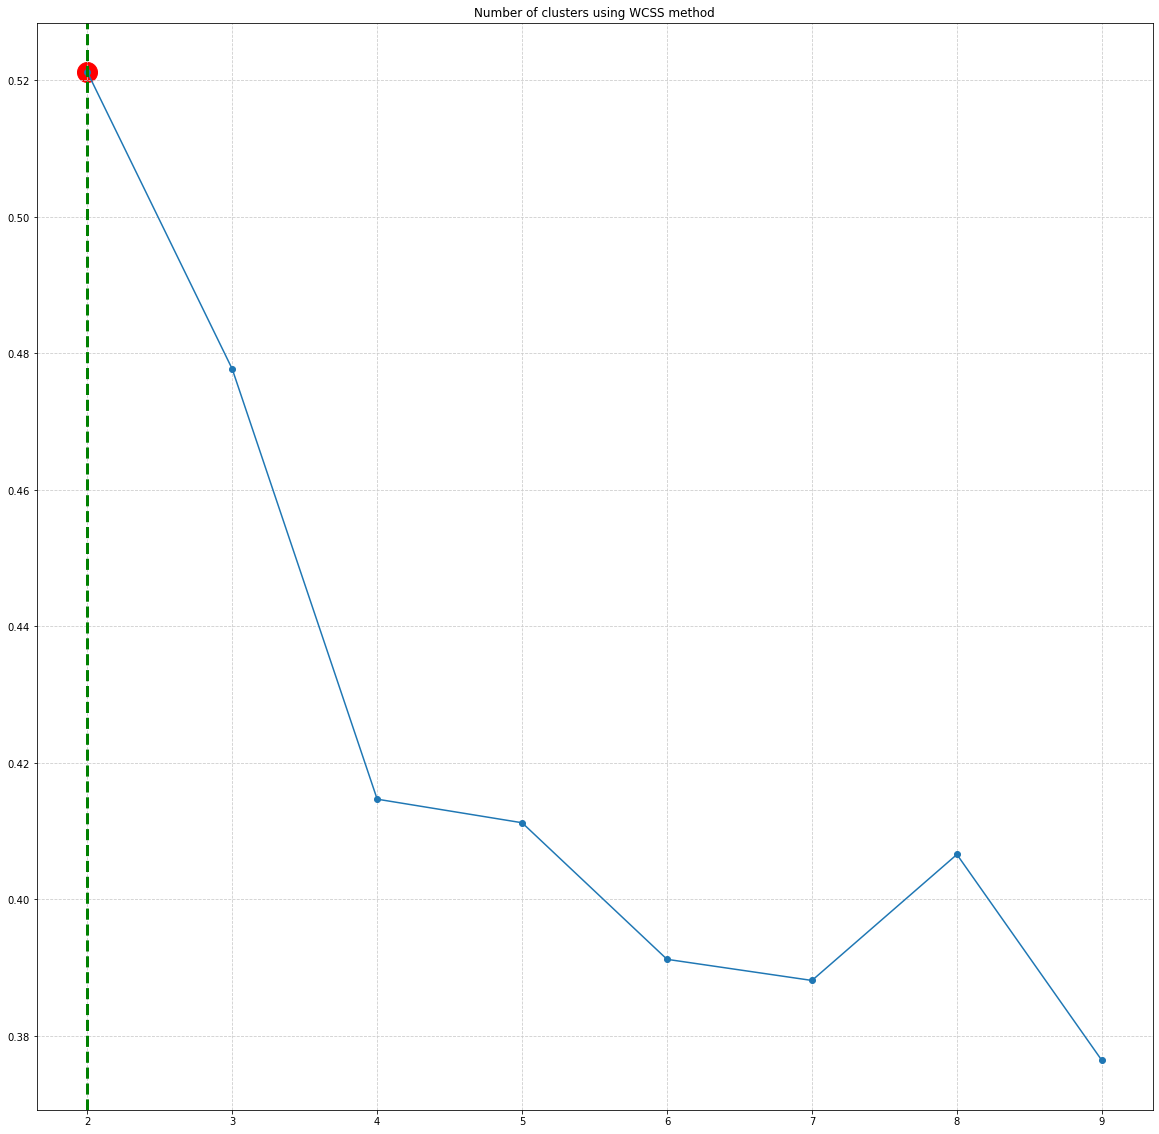

In [226]:
plt.figure(figsize = (20,20))
plt.plot(range(2,10),silhoutte_scores, marker = 'o')
plt.xlabel = ('Number of Clusters')
plt.ylabel = ('Silhouette Score')
plt.grid(which = 'major', color = '#cccccc', linestyle = '--')
plt.title('Number of clusters using WCSS method')

#optimal cluster
k = np.argmax(silhoutte_scores)+2
plt.axvline(x=k, linestyle = '--', c = 'green', linewidth = 3, label = 'Optimal Cluster(())'.format(k))
plt.scatter(k, silhoutte_scores[k-2],c='red', s=400)

plt.show()

From above diagram, we can conclude that there are 2 clusters for kmeans clustering.

In [227]:
#performing k-means clustering
kmeans = KMeans(n_clusters=2, random_state=21)
kmeans.fit(pca_credit)

KMeans(n_clusters=2, random_state=21)

In [229]:
df_seg_kmeans = pd.concat([df.reset_index(drop=True), pd.DataFrame(pca_credit)], axis = 1)
df_seg_kmeans.columns.values[-2:] = ['Component 1', 'Component 2']
df_seg_kmeans['Segment K-means PCA'] = kmeans.labels_

In [230]:
df_seg_kmeans.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,0,1,2,Component 1,Component 2,Segment K-means PCA
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,201.802084,139.509787,0.000000,12,-4324.351008,915.734333,201.122729,-152.782832,56.070543,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,4103.032597,1072.340217,0.222222,12,4120.975546,-2437.938847,2361.236482,-3923.450851,52.137671,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,622.066742,627.284787,0.000000,12,1498.994555,-2001.750670,-2109.071892,1052.164413,-303.906631,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.000000,312.452292,0.000000,12,1321.563972,-1387.728898,-2765.268751,1263.158294,-481.252569,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,678.334763,244.791237,0.000000,12,-3741.083696,751.701480,529.244726,-227.577068,-227.498468,0


In [231]:
df_seg_kmeans['Segment'] = df_seg_kmeans['Segment K-means PCA'].map({0:'first',
                                                                    1:'second'})

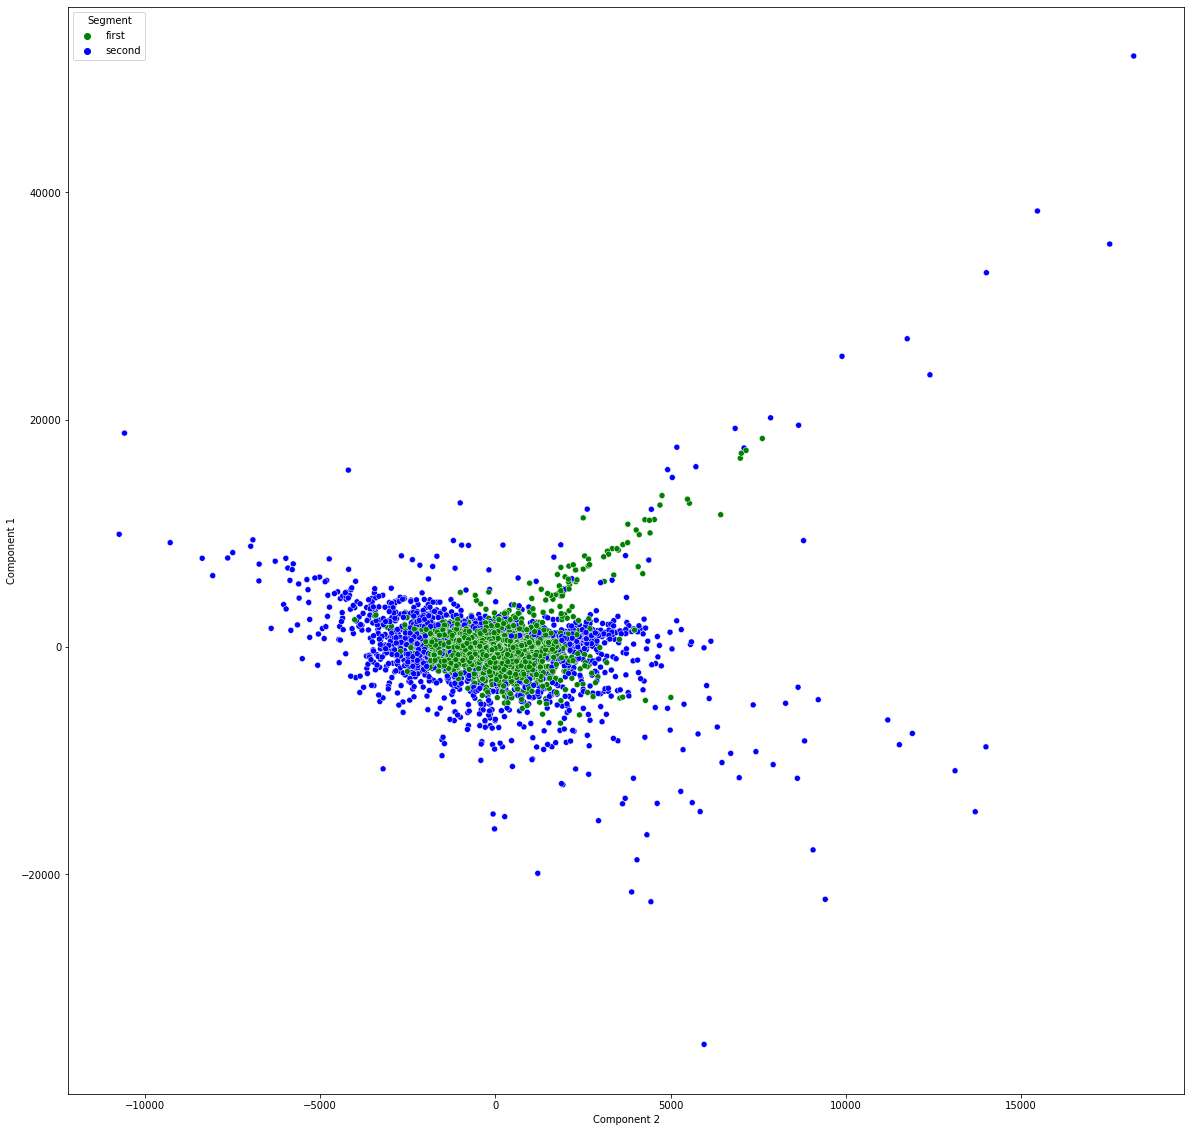

In [232]:
xaxis = df_seg_kmeans['Component 2']
yaxis = df_seg_kmeans['Component 1']
plt.figure(figsize = (20,20))
sns.scatterplot(xaxis, yaxis, hue = df_seg_kmeans['Segment'], palette = ['g', 'b' ])
plt.show()

Now, lets see the relation between 2 variables and how they are clustered between the two groups of people spending patterns using their credit cards.

In [240]:
df['cluster_id'] = kmeans.labels_

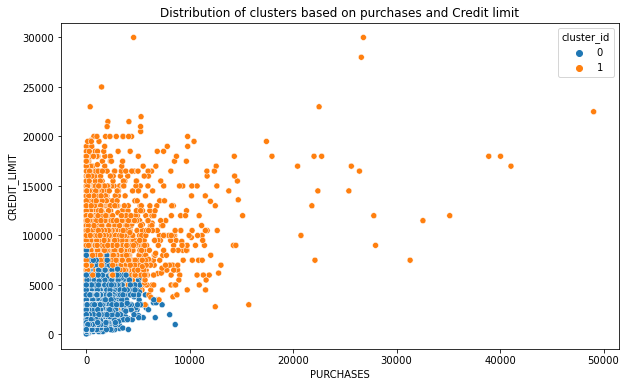

In [241]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='PURCHASES', y='CREDIT_LIMIT', hue='cluster_id')
plt.title('Distribution of clusters based on purchases and Credit limit')
plt.show()

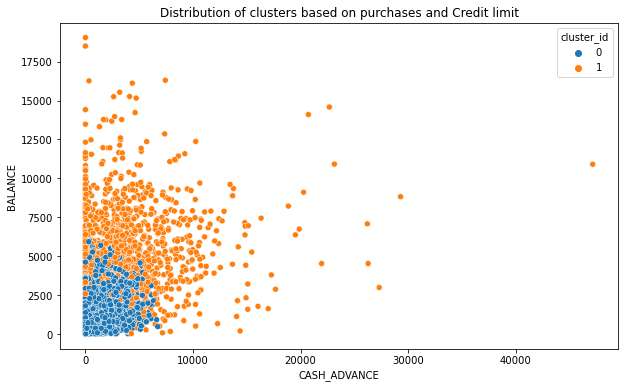

In [243]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='CASH_ADVANCE', y='BALANCE', hue='cluster_id')
plt.title('Distribution of clusters based on purchases and Credit limit')
plt.show()

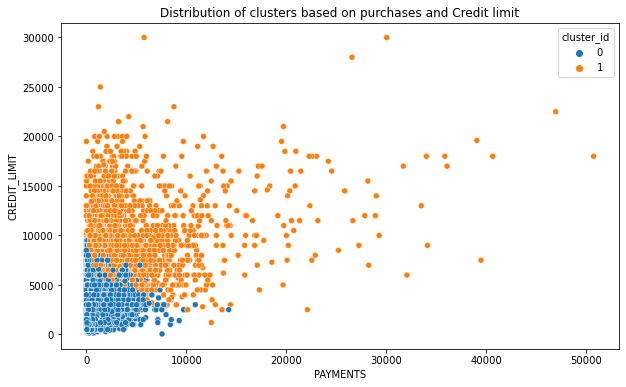

In [245]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='PAYMENTS', y='CREDIT_LIMIT', hue='cluster_id')
plt.title('Distribution of clusters based on purchases and Credit limit')
plt.show()

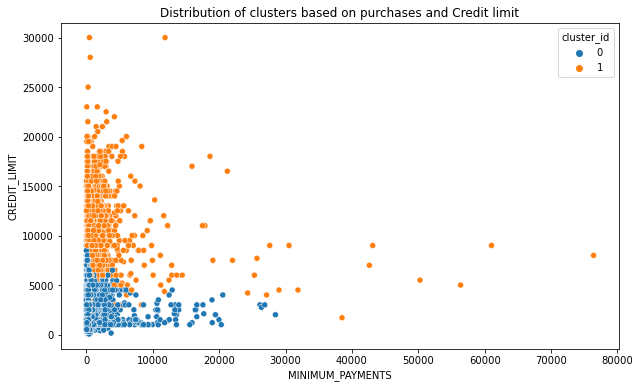

In [247]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='MINIMUM_PAYMENTS', y='CREDIT_LIMIT', hue='cluster_id')
plt.title('Distribution of clusters based on purchases and Credit limit')
plt.show()